# Installing libraries

In [ ]:
!pip install transformers
!pip install SentencePiece

#Importing Python Libraries

### This code imports various Python libraries for data manipulation, visualization, machine learning, and natural language processing. It includes NumPy and Pandas for data handling, Matplotlib and Seaborn for plotting, NLTK for text processing, and Sklearn for machine learning tasks like logistic regression and model evaluation. It also imports transformers and PyTorch to work with BERT and ALBERT models for NLP tasks, while ignoring warnings during execution.

In [ ]:
import numpy as nmpy#By using alias nmpy here imported numpy library from python
import pandas as pn_ds #By using alias pn_ds here imported pandas library from python
from wordcloud import WordCloud #By using alias WordCloud here imported wordcloud library from python
import matplotlib.pyplot as mt_plot #By using alias mt_plot here imported matplotlib.pyplot library from python
import seaborn as se_brn #By using alias se_brn here imported seaborn library from python
import nltk #By using alias nltk here imported nltk library from python
from nltk.corpus import stopwords #By using alias stopwords here imported stopwords library from python
from nltk.stem.porter import PorterStemmer #By using alias PorterStemmer here imported PorterStemmer library from python
from nltk.stem import WordNetLemmatizer #By using alias WordNetLemmatizer here imported WordNetLemmatizer library from python
import re #By using alias re here imported re library from python
from collections import Counter #By using alias Counter here imported Counter library from python
from sklearn.feature_extraction.text import TfidfVectorizer #By using alias TfidfVectorizer here imported TfidfVectorizer library from python
from sklearn.model_selection import train_test_split #By using alias train_test_split here imported train_test_split library from python
from sklearn.linear_model import LogisticRegression #By using alias LogisticRegression here imported LogisticRegression library from python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix #By using alias accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix here imported these library from python
import os #By using alias os here imported os library from python
from transformers import BertTokenizer, BertForSequenceClassification #By using alias BertTokenizer, BertForSequenceClassification here imported these library from python
import torch #By using alias torch here imported torch library from python
from torch.utils.data import DataLoader, TensorDataset #By using alias DataLoader, TensorDataset here imported these library from python
from transformers import AlbertTokenizer, AlbertForSequenceClassification #By using alias AlbertTokenizer, AlbertForSequenceClassification here imported these library from python
import warnings #By using alias warnings here imported warnings library from python
warnings.filterwarnings('ignore') #By using alias filterwarnings here imported filterwarnings library from python

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Unzip data in drive in the same location
!unzip '/content/drive/MyDrive/Sentiment Analysis Code/archive (14).zip' -d '/content/drive/MyDrive/Sentiment Analysis Code/'

Archive:  /content/drive/MyDrive/Sentiment Analysis Code/archive (14).zip
  inflating: /content/drive/MyDrive/Sentiment Analysis Code/IMDB Dataset.csv  


In [ ]:
imdb_data = pn_ds.read_csv('/content/drive/MyDrive/Sentiment Analysis Code/IMDB Dataset.csv')

In [ ]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb_data.shape

(50000, 2)

In [ ]:
imdb_data.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
imdb_data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
imdb_data.duplicated().sum()

418

In [ ]:
imdb_data.drop_duplicates(inplace=True)

In [ ]:
imdb_data.duplicated().sum()

0

In [ ]:
imdb_data.sentiment.value_counts()

,count
sentiment,
positive,24884
negative,24698


# WordCloud

### This code creates and displays a word cloud to visualize the most frequent words in the IMDB reviews. First, it concatenates all the reviews from the 'review' column of the imdb_data DataFrame into a single string. Using the WordCloud library, it generates a word cloud with specified dimensions (800x400) and a white background. The words in the reviews are shown in sizes proportional to their frequency. The Matplotlib library is then used to plot the word cloud, where the figure size is set, the word cloud image is displayed without axis labels, and a title ("Word Cloud of IMDB Reviews") is added. Finally, the plot is displayed, providing a visual summary of the most common words in the IMDB reviews.

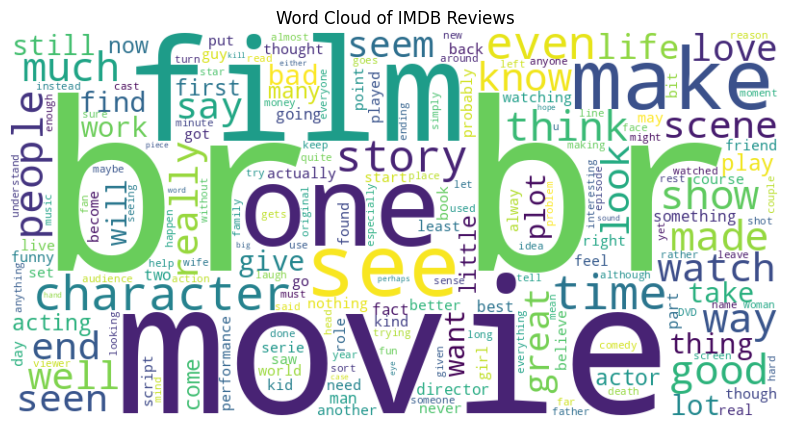

In [ ]:
# Plot word cloud
# Concat all processed reviews into a singlestring
all_reviews = " ".join(imdb_data['review'])  # Assuming 'review' column contains processed reviews

# Generating the word_cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)  # Adjust parameters as needed

# Display the word cloud
mt_plot.figure(figsize=(10, 5))  # Adjust the figure size as needed
mt_plot.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
mt_plot.axis("off")  # Turn off axis labels and ticks
mt_plot.title('Word Cloud of IMDB Reviews')  # Add a title
mt_plot.show()  # Display the plot

In [ ]:
imdb_data['sentiment'] = imdb_data['sentiment'].replace({'positive': 1, 'negative': 0})

In [ ]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


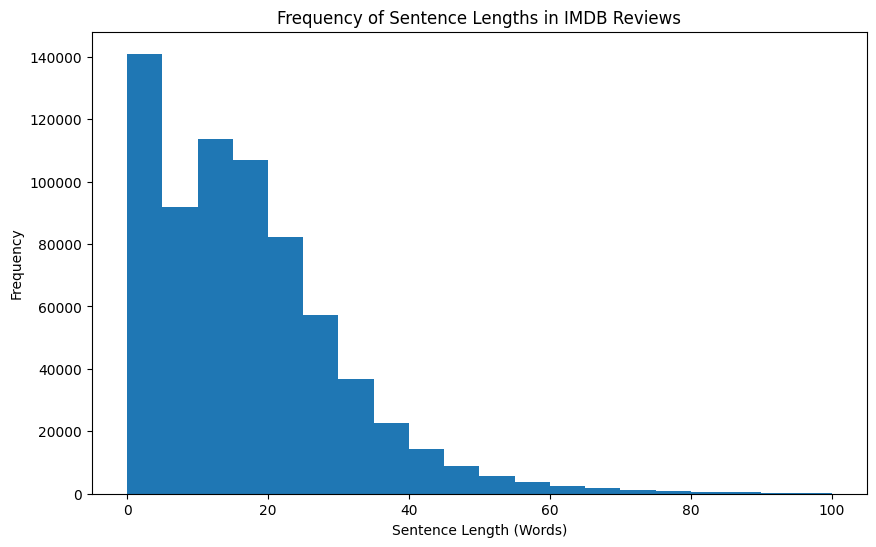

In [ ]:
# Plot the graph to show frequency of longest sentences
# Assuming 'review' column contains the movie reviews
sentence_lengths = []  # List to store lengths of sentences
for review in imdb_data['review']:
  sentences = review.split('.')  # Split review into sentences based on '.'
  for sentence in sentences:  # Iterate through each sentence
    sentence_lengths.append(len(sentence.split()))  # Count words in each sentence

# Create a histogram of sentence lengths
mt_plot.figure(figsize=(10, 6))  # Adjust the figure size as needed
mt_plot.hist(sentence_lengths, bins=20, range=[0, 100])  # Adjust bins and range as needed
mt_plot.xlabel('Sentence Length (Words)')
mt_plot.ylabel('Frequency')  # Add labels and title
mt_plot.title('Frequency of Sentence Lengths in IMDB Reviews')  # Add a title
mt_plot.show()  # Display the plot


# Preprocessing of the dataset

### This code performs text preprocessing on IMDB reviews to clean the data. First, it downloads necessary NLTK resources, such as stopwords and the "punkt" tokenizer. A set of English stopwords is then loaded for potential use. The function clean_review() is defined to clean individual reviews by removing HTML tags, URLs, non-alphabetic characters, and converting the text to lowercase. It also splits the text into words and joins them back into a cleaned string. This function is applied to the 'review' column of the imdb_data DataFrame, creating a new column called 'Processed_review' with the cleaned text. Finally, the code displays the updated DataFrame with this new column.








In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))  # Get the set of English stopwords

def clean_review(colmn_slctd):  # Function to clean the review text
  colmn_slctd = re.sub('<.*?>', '', colmn_slctd)  # Remove HTML tags
  colmn_slctd = re.sub(r'http\S+', '', colmn_slctd)  # Remove URLs
  colmn_slctd = re.sub('[^a-zA-Z]', ' ', colmn_slctd) # Remove non-alphabetic characters
  colmn_slctd = colmn_slctd.lower()
  colmn_slctd = colmn_slctd.split()
  colmn_slctd = ' '.join(colmn_slctd)
  return colmn_slctd  # Return the cleaned review


imdb_data['Processed_review'] = imdb_data['review'].apply(clean_review)  # Apply the clean_review function to the 'review' column

imdb_data.head()  # Display the updated DataFrame with the new 'Processed_review' column


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,sentiment,Processed_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is a...


In [ ]:
nltk.download('wordnet')  # Download WordNet if not already downloaded

lemmatizer = WordNetLemmatizer()  # Initialize the WordNet lemmatizer

def lemmatize_review(colmn_slctd):  # Function to lemmatize the review text
  colmn_slctd = colmn_slctd.split()  # Split the review into words
  colmn_slctd = [lemmatizer.lemmatize(word) for word in colmn_slctd]  # Lemmatize each word
  colmn_slctd = ' '.join(colmn_slctd)  # Join the lemmatized words back into a single string
  return colmn_slctd  # Return the lemmatized review

imdb_data['Lemmatized_review'] = imdb_data['Processed_review'].apply(lemmatize_review)  # Apply the lemmatize_review function to the 'Processed_review' column

imdb_data.head()  # Display the updated DataFrame with the new 'Lemmatized_review' column

[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment,Processed_review,Lemmatized_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tech...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,0,basically there s a family where a little boy ...,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is a...,petter mattei s love in the time of money is a...


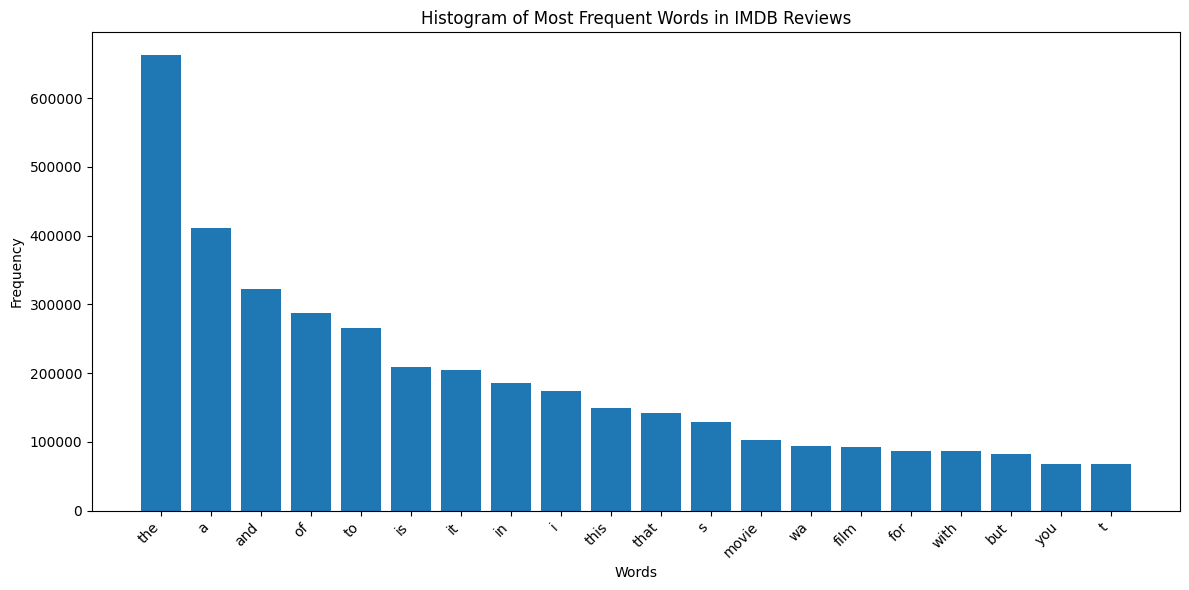

In [ ]:
# Plot histogram for most frequent words
# Assuming 'Lemmatized_review' column contains processed reviews
all_words = []  # List to store all words from processed reviews
for review in imdb_data['Lemmatized_review']:  # Iterate through each processed review
  words = review.lower().split()  # Split review into words and convert to lowercase
  all_words.extend(words)  # Add words to the all_words list

# Count word frequencies
word_counts = Counter(all_words)  # Count the frequency of each word

# Get the most frequent words
most_comon_words = word_counts.most_common(20)  # Change 20 to adjust the number of words

# Extract words and counts for plotting
words = [word for word, count in most_comon_words]  # Extract words from the most_common_words list
counts = [count for word, count in most_comon_words]  # Extract counts from the most_common_words list

# Plot the histogram
mt_plot.figure(figsize=(12, 6))  # Adjust the figure size as needed
mt_plot.bar(words, counts)  # Plot the histogram
mt_plot.xlabel('Words')  # Add labels and title
mt_plot.ylabel('Frequency')  # Add labels and title
mt_plot.title('Histogram of Most Frequent Words in IMDB Reviews')  # Add a title
mt_plot.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
mt_plot.tight_layout()  # Adjust layout to prevent labels from overlapping
mt_plot.show()  # Display the plot


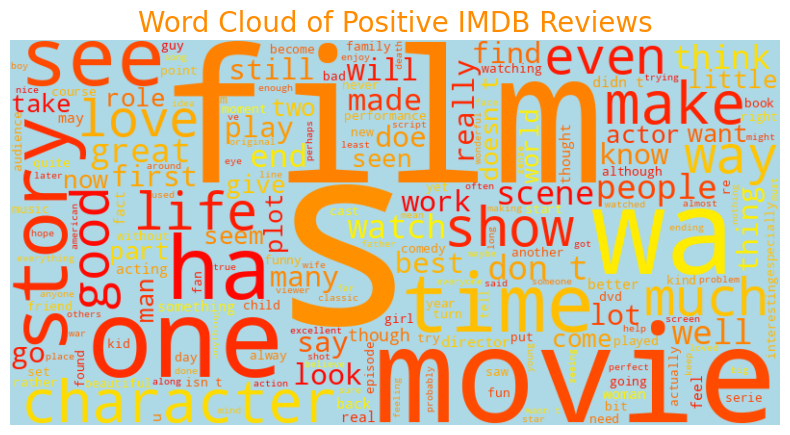

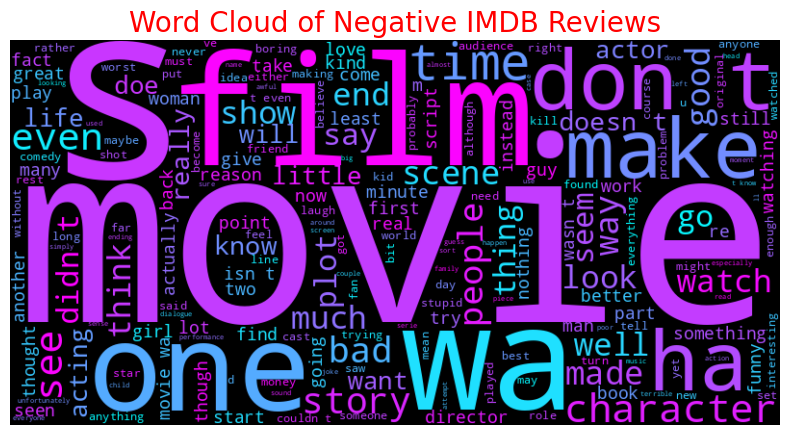

In [ ]:
# Assuming 'sentiment' column contains 1 for positive and 0 for negative
positive_reviews = imdb_data[imdb_data['sentiment'] == 1]['Lemmatized_review']  # Filter positive reviews
negative_reviews = imdb_data[imdb_data['sentiment'] == 0]['Lemmatized_review']  # Filter negative reviews

# Concatenate positive and negative reviews into separate strings
all_positive_reviews = " ".join(positive_reviews)  # Join positive reviews with spaces
all_negative_reviews = " ".join(negative_reviews)  # Join negative reviews with spaces

# Customize word cloud appearance for positive and negative reviews
# Positive: Light blue background, warm colored words
wordcloud_positive = WordCloud(width=800, height=400,
                               background_color='lightblue',  # Light blue background
                               colormap='autumn',  # Warm colors
                               contour_color='darkorange',  # Dark orange contour
                               contour_width=2).generate(all_positive_reviews)  # Generate word cloud

# Negative: Dark background, cool colored words
wordcloud_negative = WordCloud(width=800, height=400,
                               background_color='black',  # Dark background
                               colormap='cool',  # Cool colors
                               contour_color='red',
                               contour_width=2).generate(all_negative_reviews)  # Generate word cloud

# Display the word clouds with custom styles
mt_plot.figure(figsize=(10, 5))  # Adjust the figure size as needed
mt_plot.imshow(wordcloud_positive, interpolation='bilinear')  # Display the word cloud
mt_plot.axis("off")  # Turn off axis labels and ticks
mt_plot.title('Word Cloud of Positive IMDB Reviews', fontsize=20, color='darkorange')  # Add a title
mt_plot.show()  # Display the plot

mt_plot.figure(figsize=(10, 5))  # Adjust the figure size as needed
mt_plot.imshow(wordcloud_negative, interpolation='bilinear')  # Display the word cloud
mt_plot.axis("off")  # Turn off axis labels and ticks
mt_plot.title('Word Cloud of Negative IMDB Reviews', fontsize=20, color='red')  # Add a title
mt_plot.show()  # Display the plot


## Logistic Regression with TF-IDF

### This code trains a logistic regression model to predict the sentiment of IMDB reviews using the TF-IDF approach for feature extraction. First, the data is split into training and testing sets, where the Lemmatized_review column serves as the input features, and the sentiment column is the target. A TfidfVectorizer is used to convert the reviews into numerical representations by extracting the 5000 most important words and phrases (unigrams and bigrams), while ignoring English stopwords. The vectorizer is fitted to the training data and then applied to the test data. A Logistic Regression classifier is trained on the transformed training data and then used to make prdictns on the test set. The model's performance is evaluated using the accuracy score and a classification report, which provides precision, recall, and F1-score for sentiment prediction.

In [ ]:
# Split the data
tr_an_X, tst_X, tr_an_y, tst_y = train_test_split(imdb_data['Lemmatized_review'], imdb_data['sentiment'], test_size=0.1, random_state=42)

# Initialize vectorizer
 tf_idf_vctrizr = TfidfVectorizer(max_features=5000,  # You can increase this number if needed
                                   stop_words='english',  # Use 'english' for English stopwords
                                   ngram_range=(1, 2))  # Use unigrams and bigrams for richer features

# Fit the vectorizer
tr_an_X_tfidf =  tf_idf_vctrizr.fit_transform(tr_an_X)  # Fit and transform training data
tst_X_tfidf =  tf_idf_vctrizr.transform(tst_X)  # Transform test data using the fitted vectorizer

# Train a classifier (using Logistic Regression here as an example)
classifier = LogisticRegression()
classifier.fit(tr_an_X_tfidf, tr_an_y)  # Fit the classifier on the training data

# Make prdictns on the test set
y_prdctn = classifier.predict(tst_X_tfidf)

# Evaluate the model performance
accuracy = accuracy_score(tst_y, y_prdctn)  # Calculating the accuracy of logisticregresion model for test set
print(f'Accuracy: {accuracy}')  # Print accuracy of test set of logreg model

# Calculate precision, recall, and F1 score
print('Classification Report:')  # Print classification report of logreg model
print(classification_report(tst_y, y_prdctn))


Accuracy: 0.8854607783827384
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2487
           1       0.88      0.90      0.89      2472

    accuracy                           0.89      4959
   macro avg       0.89      0.89      0.89      4959
weighted avg       0.89      0.89      0.89      4959



Logistic Regression Training Set Results:
Logistic Regression Accuracy: 0.9116823162942878
Logistic Regression Precision: 0.9118353788131043
Logistic Regression Recall: 0.9116823162942878
Logistic Regression F1 Score: 0.9116697561779094



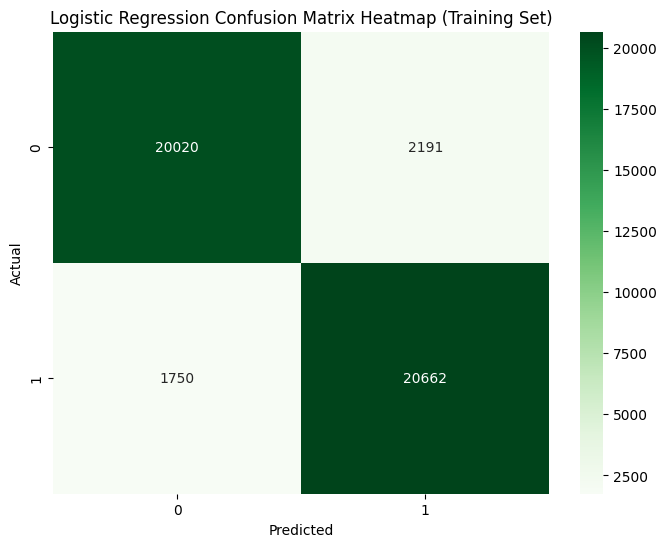

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     22211
           1       0.90      0.92      0.91     22412

    accuracy                           0.91     44623
   macro avg       0.91      0.91      0.91     44623
weighted avg       0.91      0.91      0.91     44623



In [ ]:
# Make prdictns on both the training and test sets
 logreg_y_prdctn_tran = classifier.predict(tr_an_X_tfidf)

# Evaluate the model performance on the training set
logreg_acurcy_tr_an = accuracy_score(tr_an_y,  logreg_y_prdctn_tran)  # Calculate accuracy of train set of logreg model
 log_reg_prcisn_trn = precision_score(tr_an_y,  logreg_y_prdctn_tran, average='weighted')  # Calculate precision of train set of logreg model
 log_reg_recal_trn = recall_score(tr_an_y,  logreg_y_prdctn_tran, average='weighted')  # Calculate recall of train set of logreg model
 log_reg_f1_trn = f1_score(tr_an_y,  logreg_y_prdctn_tran, average='weighted')  # Calculate F1 score of train set of logreg model

# Print training and testing set metrics
print("Logistic Regression Training Set Results:")  # Print training set results of logreg model
print(f' Accuracy: {logreg_acurcy_tr_an}')  # Print accuracy of train set of logreg model
print(f' Precision: { log_reg_prcisn_trn}')  # Print precision of train set of logreg model
print(f' Recall: { log_reg_recal_trn}')  # Print recall of train set of logreg model
print(f' F1 Score: { log_reg_f1_trn}\n')  # Print F1 score of train set of logreg model


# Confusion matrix for the training set
logreg_conf_matrix_train = confusion_matrix(tr_an_y,  logreg_y_prdctn_tran)  # Calculate confusion matrix of train set of logreg model

# Plotting the heatmap for the confusion matrix (training set)
mt_plot.figure(figsize=(8, 6))
se_brn.heatmap(logreg_conf_matrix_train, annot=True, fmt='d', cmap='Greens', xticklabels=classifier.classes_, yticklabels=classifier.classes_)  # Plot heatmap
mt_plot.title('Logistic Regression Confusion Matrix Heatmap (Training Set)')  # Add title
mt_plot.xlabel('Predicted')  # Add labels
mt_plot.ylabel('Actual')  # Add labels
mt_plot.show()


# Classification report for the training set
print('Classification Report (Training Set):')
print(classification_report(tr_an_y,  logreg_y_prdctn_tran))  # Print classification report of train set of logreg model

Logistic Regression Test Set Results:
Logistic Regression Accuracy: 0.8854607783827384
Logistic Regression Precision: 0.8856798888056884
Logistic Regression Recall: 0.8854607783827384
Logistic Regression F1 Score: 0.8854491613526296



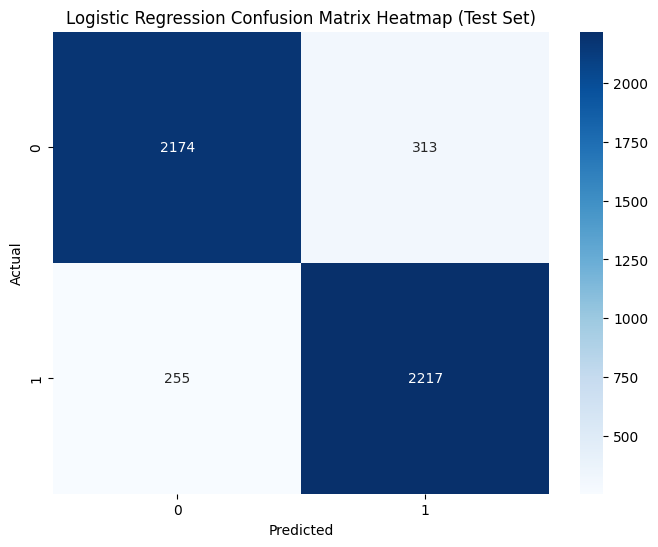

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2487
           1       0.88      0.90      0.89      2472

    accuracy                           0.89      4959
   macro avg       0.89      0.89      0.89      4959
weighted avg       0.89      0.89      0.89      4959



In [ ]:
logreg_y_prdctn_test = classifier.predict(tst_X_tfidf)

# Evaluate the model performance on the test set
logreg_acurcy_tst = accuracy_score(tst_y, logreg_y_prdctn_test)  # Calculate accuracy of test set of logreg model
logreg_precsn_tst = precision_score(tst_y, logreg_y_prdctn_test, average='weighted')  # Calculate precision of test set of logreg model
logreg_recal_tst = recall_score(tst_y, logreg_y_prdctn_test, average='weighted')  # Calculate recall of test set of logreg model
logreg_f1_test = f1_score(tst_y, logreg_y_prdctn_test, average='weighted')  # Calculate F1 score of test set of logreg model

print("Logistic Regression Test Set Results:")
print(f' Accuracy: {logreg_acurcy_tst}')  # Print accuracy of test set of logreg model
print(f' Precision: {logreg_precsn_tst}')  # Print precision of test set of logreg model
print(f' Recall: {logreg_recal_tst}')  # Print recall of test set of logreg model
print(f' F1 Score: {logreg_f1_test}\n')  # Print F1 score of test set of logreg model

# Confusion matrix for the test set
logreg_conf_matrix_test = confusion_matrix(tst_y, logreg_y_prdctn_test)  # Calculate confusion matrix of test set of logreg model

# Plotting the heatmap for the confusion matrix (test set)
mt_plot.figure(figsize=(8, 6))  # Adjust the figure size as needed
se_brn.heatmap(logreg_conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)  # Plot heatmap
mt_plot.title('Logistic Regression Confusion Matrix Heatmap (Test Set)')
mt_plot.xlabel('Predicted')
mt_plot.ylabel('Actual')
mt_plot.show()

# Classification report for the test set
print('Classification Report (Test Set):')
print(classification_report(tst_y, logreg_y_prdctn_test))  # Print classification report of test set of logreg model

# TinyBert with saved Model

### This code fine-tunes a pre-trained TinyBERT model for binary sentiment classification on IMDB reviews. The reviews are tokenized and encoded using BERTTokenizer, and then converted into PyTorch datasets for training and testing. The model is trained over 10 epochs with the AdamW optimizer, and test accuracy is calculated after each epoch. The best-performing model is saved during training. After training, the best model is reloaded for final evaluation, and the test accuracy is reported.

In [ ]:
# Load pre-trained TinyBERT tokenizer and model
 tinybert_mdl_nam = 'huawei-noah/TinyBERT_General_4L_312D'
 tinybert_toknizr = BertTokenizer.from_pretrained( tinybert_mdl_nam)
tinybert_model = BertForSequenceClassification.from_pretrained( tinybert_mdl_nam, num_labels=2)

# Tokenize and encode the data
tinybert_max_length = 512
tinybert_tran_encdng =  tinybert_toknizr(list(tr_an_X), truncation=True, padding=True, max_length=tinybert_max_length, return_tensors='pt')
tinybert_tst_encdng =  tinybert_toknizr(list(tr_an_X), truncation=True, padding=True, max_length=tinybert_max_length, return_tensors='pt')
tinybert_tran_lbls, tinybert_tst_lbls = torch.tensor(list(tr_an_y.values)), torch.tensor(list(tst_y.values))

# Create datasets and dataloaders
tinybert_tr_an_dtst = TensorDataset(tinybert_tran_encdng['input_ids'], tinybert_tran_encdng['attention_mask'], tinybert_tran_lbls)
tinybert_t_st_dtst = TensorDataset(tinybert_tst_encdng['input_ids'], tinybert_tst_encdng['attention_mask'], tinybert_tst_lbls)
tinybert_tran_lodr = DataLoader(tinybert_tr_an_dtst, batch_size=16, shuffle=True)
tinybert_tst_lodr = DataLoader(tinybert_t_st_dtst, batch_size=64)

# Training setup
tinybert_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tinybert_model.to(tinybert_device)
 tinybert_optimizr = torch.optim.AdamW(tinybert_model.parameters(), lr=5e-5)

# Initialize variables to track the best model
 bst_acurcy = 0.0
 bst_mdl_pth = "best_tinybert_model.pth"

# Training loop
for epoch in range(10):
    tinybert_model.train()
    for batch in tinybert_tran_lodr:
         tinybert_optimizr.zero_grad()
        input_ids, attention_mask, labels = [x.to(tinybert_device) for x in batch]
        outputs = tinybert_model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        outputs.loss.backward()
         tinybert_optimizr.step()

    # Evaluation after each epoch
    tinybert_model.eval()
    tny_brt_prdctn, tny_brt_tru_lbls = [], []

    with torch.no_grad():
        for batch in tinybert_tst_lodr:
            input_ids, attention_mask, labels = [x.to(tinybert_device) for x in batch]
            logits = tinybert_model(input_ids=input_ids, attention_mask=attention_mask).logits
            tny_brt_prdctn.extend(torch.argmax(logits, dim=-1).cpu().numpy())
            tny_brt_tru_lbls.extend(labels.cpu().numpy())

    # Calculate accuracy
    tny_brt_acurcy = accuracy_score(tny_brt_tru_lbls, tny_brt_prdctn)
    print(f"Epoch {epoch + 1}, TinyBERT Test Accuracy: {tny_brt_acurcy}")

    # Save the model with best accuracy so far
    if tny_brt_acurcy >  bst_acurcy:
         bst_acurcy = tny_brt_acurcy
        torch.save(tinybert_model.state_dict(),  bst_mdl_pth)
        print(f"New best model saved with accuracy: { bst_acurcy}")

# Load the best model for future use
tinybert_model.load_state_dict(torch.load( bst_mdl_pth))
tinybert_model.eval()

# Perform final evaluation using the best model
tny_brt_prdctn, tny_brt_tru_lbls = [], []
with torch.no_grad():
    for batch in tinybert_tst_lodr:
        input_ids, attention_mask, labels = [x.to(tinybert_device) for x in batch]
        logits = tinybert_model(input_ids=input_ids, attention_mask=attention_mask).logits
        tny_brt_prdctn.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        tny_brt_tru_lbls.extend(labels.cpu().numpy())

# Calculate and print final accuracy
tny_brt_acurcy = accuracy_score(tny_brt_tru_lbls, tny_brt_prdctn)
print(f"Final TinyBERT Test Accuracy using the best model: {tny_brt_acurcy}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, TinyBERT Test Accuracy: 0.8923169993950393
New best model saved with accuracy: 0.8923169993950393
Epoch 2, TinyBERT Test Accuracy: 0.9001814882032668
New best model saved with accuracy: 0.9001814882032668
Epoch 3, TinyBERT Test Accuracy: 0.8846541641459972
Epoch 4, TinyBERT Test Accuracy: 0.8933252671909659
Epoch 5, TinyBERT Test Accuracy: 0.8947368421052632
Epoch 6, TinyBERT Test Accuracy: 0.8929219600725953
Epoch 7, TinyBERT Test Accuracy: 0.8903004638031862
Epoch 8, TinyBERT Test Accuracy: 0.8888888888888888
Epoch 9, TinyBERT Test Accuracy: 0.8854607783827384
Epoch 10, TinyBERT Test Accuracy: 0.8872756604154063
Final TinyBERT Test Accuracy using the best model: 0.9001814882032668


TinyBERT Training Set Results using the Best Model:
TinyBERT Accuracy: 0.9593034981959976
TinyBERT Precision: 0.95976690698556
TinyBERT Recall: 0.9593034981959976
TinyBERT F1 Score: 0.9592962599159636


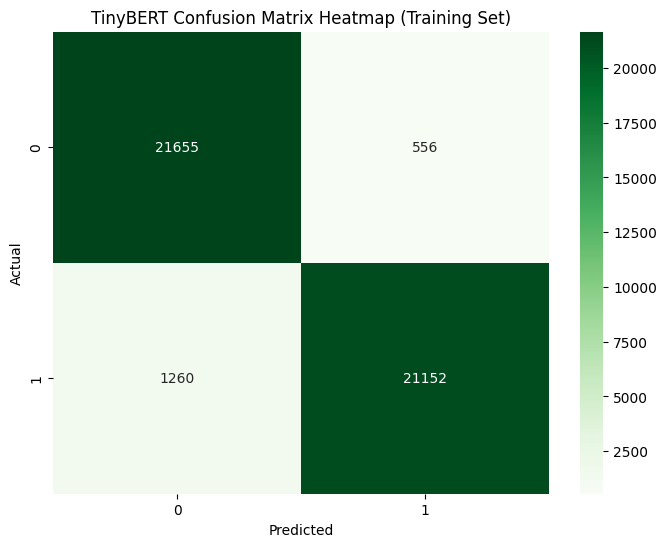

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22211
           1       0.97      0.94      0.96     22412

    accuracy                           0.96     44623
   macro avg       0.96      0.96      0.96     44623
weighted avg       0.96      0.96      0.96     44623



In [ ]:
# Load the best model before evaluation
 bst_mdl_pth = "best_tinybert_model.pth"
tinybert_model.load_state_dict(torch.load( bst_mdl_pth))
tinybert_model.eval()

# Evaluation (modified to get all metrics)
tny_brt_prdctn, tny_brt_tru_lbls = [], []

with torch.no_grad():
    for batch in tinybert_tran_lodr:  # Use tran_lodr for training set results
        input_ids, attention_mask, labels = [x.to(tinybert_device) for x in batch]
        logits = tinybert_model(input_ids=input_ids, attention_mask=attention_mask).logits
        tny_brt_prdctn.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        tny_brt_tru_lbls.extend(labels.cpu().numpy())

# Calculate and print all metrics
tny_brt_acurcy = accuracy_score(tny_brt_tru_lbls, tny_brt_prdctn) #The accuracy of tinybert model is calculated for the traiing set of the dataset
tny_brt_precsn = precision_score(tny_brt_tru_lbls, tny_brt_prdctn, average='weighted') #The precision of tinybert model is calculated for the traiing set of the dataset
tny_brt_recal = recall_score(tny_brt_tru_lbls, tny_brt_prdctn, average='weighted') #The recall of tinybert model is calculated for the traiing set of the dataset
tinybert_f1 = f1_score(tny_brt_tru_lbls, tny_brt_prdctn, average='weighted') #The f1 score of tinybert model is calculated for the traiing set of the dataset

print(f"TinyBERT Training Set Results using the Best Model:")
print(f"TinyBERT Accuracy: {tny_brt_acurcy}") #The accuracy of tinybert model is printed by using the traiing set of the dataset
print(f"TinyBERT Precision: {tny_brt_precsn}") #The precision of tinybert model is printed by using the traiing set of the dataset
print(f"TinyBERT Recall: {tny_brt_recal}") #The recall of tinybert model is printed by using the traiing set of the dataset
print(f"TinyBERT F1 Score: {tinybert_f1}") #The f1 score of tinybert model is printed by using the traiing set of the dataset
print('\n')

# Confusion matrix for the training set
tinybert_conf_matrix_train = confusion_matrix(tny_brt_tru_lbls, tny_brt_prdctn) #The confusion matrix of tinybert model is calculated for the traiing set of the dataset

# Plotting the heatmap for the confusion matrix (training set)
mt_plot.figure(figsize=(8, 6))
se_brn.heatmap(tinybert_conf_matrix_train, annot=True, fmt='d', cmap='Greens',
            xticklabels=tinybert_model.config.id2label,
            yticklabels=tinybert_model.config.id2label)
mt_plot.title('TinyBERT Confusion Matrix Heatmap (Training Set)')
mt_plot.xlabel('Predicted')
mt_plot.ylabel('Actual')
mt_plot.show()

# Classification report for the training set
print('Classification Report (Training Set):')
print(classification_report(tny_brt_tru_lbls, tny_brt_prdctn))


TinyBERT Test Set Results using the Best Model:
TinyBERT Accuracy: 0.9001814882032668
TinyBERT Precision: 0.901355230769184
TinyBERT Recall: 0.9001814882032668
TinyBERT F1 Score: 0.9000992174566804




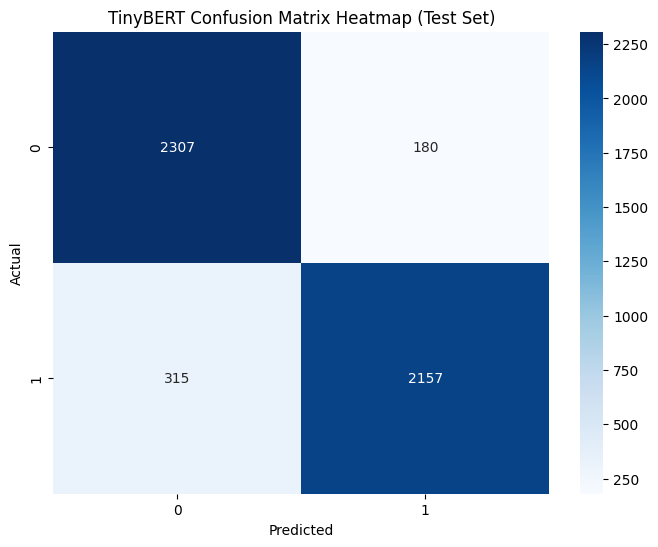

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2487
           1       0.92      0.87      0.90      2472

    accuracy                           0.90      4959
   macro avg       0.90      0.90      0.90      4959
weighted avg       0.90      0.90      0.90      4959



In [ ]:
# Load the best model before evaluation on the test set
 bst_mdl_pth = "best_tinybert_model.pth"
tinybert_model.load_state_dict(torch.load( bst_mdl_pth))
tinybert_model.eval()

# Evaluation on the test set
tny_brt_prdctn_test, tny_brt_tru_lbls_test = [], []

with torch.no_grad():
    for batch in tinybert_tst_lodr:
        input_ids, attention_mask, labels = [x.to(tinybert_device) for x in batch]
        logits = tinybert_model(input_ids=input_ids, attention_mask=attention_mask).logits
        tny_brt_prdctn_test.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        tny_brt_tru_lbls_test.extend(labels.cpu().numpy())

# Calculate and print all metrics for the test set
tinybert_acurcy_tst = accuracy_score(tny_brt_tru_lbls_test, tny_brt_prdctn_test)
tinybert_precsn_tst = precision_score(tny_brt_tru_lbls_test, tny_brt_prdctn_test, average='weighted')
tinybert_recal_tst = recall_score(tny_brt_tru_lbls_test, tny_brt_prdctn_test, average='weighted')
tinybert_f1_test = f1_score(tny_brt_tru_lbls_test, tny_brt_prdctn_test, average='weighted')

print(f"TinyBERT Test Set Results using the Best Model:")
print(f"TinyBERT Accuracy: {tinybert_acurcy_tst}")
print(f"TinyBERT Precision: {tinybert_precsn_tst}")
print(f"TinyBERT Recall: {tinybert_recal_tst}")
print(f"TinyBERT F1 Score: {tinybert_f1_test}")

print('\n')

# Confusion matrix for the test set
tinybert_conf_matrix_test = confusion_matrix(tny_brt_tru_lbls_test, tny_brt_prdctn_test)

# Plotting the heatmap for the confusion matrix (test set)
mt_plot.figure(figsize=(8, 6))
se_brn.heatmap(tinybert_conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=tinybert_model.config.id2label,
            yticklabels=tinybert_model.config.id2label)
mt_plot.title('TinyBERT Confusion Matrix Heatmap (Test Set)')
mt_plot.xlabel('Predicted')
mt_plot.ylabel('Actual')
mt_plot.show()

# Classification report for the test set
print('Classification Report (Test Set):')
print(classification_report(tny_brt_tru_lbls_test, tny_brt_prdctn_test))


# Albert Model

### This code fine-tunes an ALBERT model (albert-base-v2) for binary sentiment classification. Reviews are tokenized, encoded, and converted into PyTorch datasets. The model is trained for 5 epochs using the AdamW optimizer, and after each epoch, its test accuracy is calculated. The best model is saved and later reloaded for a final evaluation, with the final test accuracy reported.








In [ ]:
# Load pre-trained Albert tokenizer and model
model_name = 'albert-base-v2'
tokenizer = AlbertTokenizer.from_pretrained(model_name)
model = AlbertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize and encode data
max_length = 512
tran_encdng = tokenizer(list(tr_an_X), truncation=True, padding=True, max_length=max_length, return_tensors='pt')
tst_encdng = tokenizer(list(tst_X), truncation=True, padding=True, max_length=max_length, return_tensors='pt')
tran_lbls = torch.tensor(list(tr_an_y.values))
tst_lbls = torch.tensor(list(tst_y.values))

# Create datasets and dataloaders
tr_an_dtst = TensorDataset(tran_encdng['input_ids'], tran_encdng['attention_mask'], tran_lbls)
t_st_dtst = TensorDataset(tst_encdng['input_ids'], tst_encdng['attention_mask'], tst_lbls)
tran_lodr = DataLoader(tr_an_dtst, batch_size=16, shuffle=True)
tst_lodr = DataLoader(t_st_dtst, batch_size=64)

# Setup training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-6)

# Initialize variables to track the best model
 bst_acurcy = 0.0
 bst_mdl_pth = "best_albert_model.pth"

# Training loop
for epoch in range(5):
    model.train()
    for batch in tran_lodr:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        outputs.loss.backward()
        optimizer.step()

    # Evaluation on the test set at the end of each epoch
    model.eval()
    prdictns, tru_lbls = [], []
    with torch.no_grad():
        for batch in tst_lodr:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
            preds = torch.argmax(logits, dim=-1)
            prdictns.extend(preds.cpu().numpy())
            tru_lbls.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(tru_lbls, prdictns)
    print(f"Epoch {epoch + 1}, ALBERT Test Accuracy: {accuracy}")

    # Save the model if the accuracy is the best so far
    if accuracy >  bst_acurcy:
         bst_acurcy = accuracy
        torch.save(model.state_dict(),  bst_mdl_pth)
        print(f"New best model saved with accuracy: { bst_acurcy}")

# Load the best model for future use
model.load_state_dict(torch.load( bst_mdl_pth))
model.eval()

# Final evaluation with the best model
prdictns, tru_lbls = [], []
with torch.no_grad():
    for batch in tst_lodr:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=-1)
        prdictns.extend(preds.cpu().numpy())
        tru_lbls.extend(labels.cpu().numpy())

# Calculate and print final accuracy with the best model
final_accuracy = accuracy_score(tru_lbls, prdictns)
print(f"Final ALBERT Test Accuracy using the Best Model: {final_accuracy}")


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, ALBERT Test Accuracy: 0.9342609397055858
New best model saved with accuracy: 0.9342609397055858
Epoch 2, ALBERT Test Accuracy: 0.9348659003831418
New best model saved with accuracy: 0.9348659003831418
Epoch 3, ALBERT Test Accuracy: 0.9322444041137327
Epoch 4, ALBERT Test Accuracy: 0.9354708610606978
New best model saved with accuracy: 0.9354708610606978
Epoch 5, ALBERT Test Accuracy: 0.935672514619883
New best model saved with accuracy: 0.935672514619883
Final ALBERT Test Accuracy using the Best Model: 0.935672514619883


ALBERT Training Set Results using the Best Model:
ALBERT Accuracy: 0.9956524662169733
ALBERT Precision: 0.9956524719552265
ALBERT Recall: 0.9956524662169733
ALBERT F1 Score: 0.995652467085968


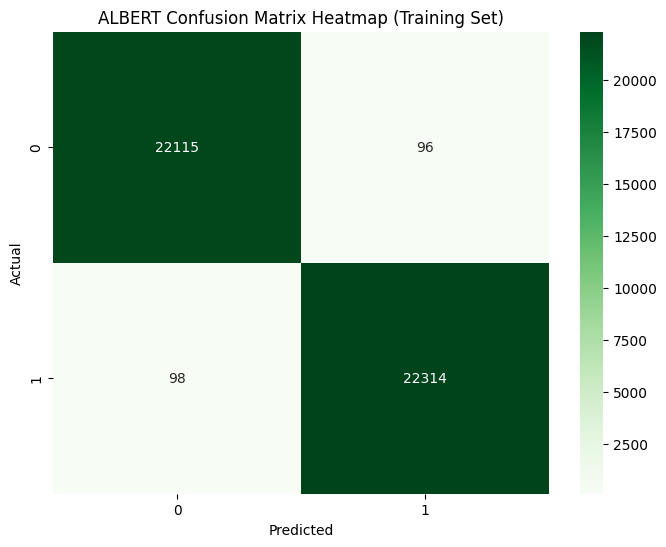

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22211
           1       1.00      1.00      1.00     22412

    accuracy                           1.00     44623
   macro avg       1.00      1.00      1.00     44623
weighted avg       1.00      1.00      1.00     44623



In [ ]:
# Load the best model before evaluation on the training set
 bst_mdl_pth = "best_albert_model.pth"
model.load_state_dict(torch.load( bst_mdl_pth))
model.eval()

# Evaluation on the training set
prdictns_train, tru_lbls_train = [], []
with torch.no_grad():
    for batch in tran_lodr:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=-1)
        prdictns_train.extend(preds.cpu().numpy())
        tru_lbls_train.extend(labels.cpu().numpy())

# Calculate and print all metrics for the training set
albert_acurcy_tr_an = accuracy_score(tru_lbls_train, prdictns_train) #Albert models's accuracy of training set is calculated here.
albert_precision_train = precision_score(tru_lbls_train, prdictns_train, average='weighted') #Albert models's Precision of training set is calculated here.
albert_recall_train = recall_score(tru_lbls_train, prdictns_train, average='weighted') #Albert models's Recall of training set is calculated here.
albert_f1_train = f1_score(tru_lbls_train, prdictns_train, average='weighted') #Albert models's F1-score of training set is calculated here.

print(f"ALBERT Training Set Results using the Best Model:")
print(f"ALBERT Accuracy: {albert_acurcy_tr_an}") #Albert models's accuracy of training set is printed here
print(f"ALBERT Precision: {albert_precision_train}") #Albert models's Precision of training set is printed here
print(f"ALBERT Recall: {albert_recall_train}") #Albert models's Recall of training set is printed here
print(f"ALBERT F1 Score: {albert_f1_train}") #Albert models's F1-score of training set is printed here

# Confusion matrix for the training set
albert_conf_matrix_train = confusion_matrix(tru_lbls_train, prdictns_train) #Albert models's conf_matrix of training set is calculated here

# Plotting the heatmap for the confusion matrix (training set)
mt_plot.figure(figsize=(8, 6))
se_brn.heatmap(albert_conf_matrix_train, annot=True, fmt='d', cmap='Greens',
            xticklabels=model.config.id2label, yticklabels=model.config.id2label)
mt_plot.title('ALBERT Confusion Matrix Heatmap (Training Set)')
mt_plot.xlabel('Predicted')
mt_plot.ylabel('Actual')
mt_plot.show()

# Classification report for the training set
print('Classification Report (Training Set):')
print(classification_report(tru_lbls_train, prdictns_train))


ALBERT Test Set Results using the Best Model:
ALBERT Accuracy: 0.935672514619883
ALBERT Precision: 0.9357298487631062
ALBERT Recall: 0.935672514619883
ALBERT F1 Score: 0.9356691765669125


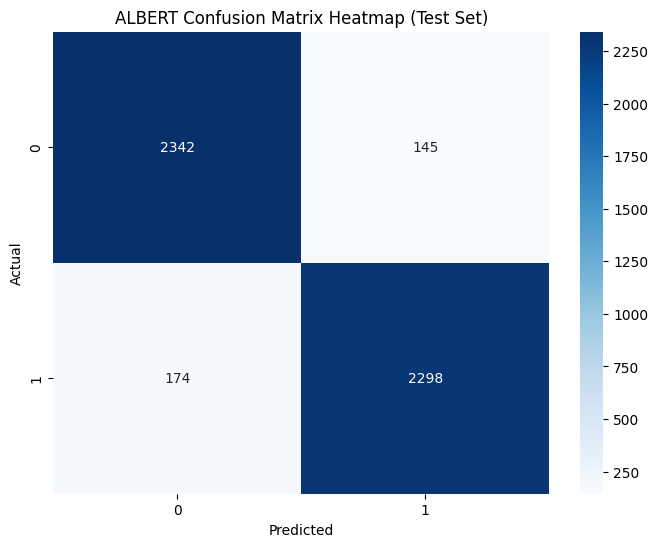

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2487
           1       0.94      0.93      0.94      2472

    accuracy                           0.94      4959
   macro avg       0.94      0.94      0.94      4959
weighted avg       0.94      0.94      0.94      4959



In [ ]:
# Load the best model before evaluation on the test set
 bst_mdl_pth = "best_albert_model.pth"
model.load_state_dict(torch.load( bst_mdl_pth))
model.eval()

# Evaluation on the test set
prdctn_tst, tru_lbls_tst = [], []
with torch.no_grad():
    for batch in tst_lodr:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
        preds = torch.argmax(logits, dim=-1)
        prdctn_tst.extend(preds.cpu().numpy())
        tru_lbls_tst.extend(labels.cpu().numpy())

# Calculate and print all metrics for the test set
albert_acurcy_tst = accuracy_score(tru_lbls_tst, prdctn_tst) #Albert models's accuracy of testing set is calculated here
albert_precsn_tst = precision_score(tru_lbls_tst, prdctn_tst, average='weighted') #Albert models's Precision of testing set is calculated here
albert_recal_tst = recall_score(tru_lbls_tst, prdctn_tst, average='weighted') #Albert models's Recall of testing set is calculated here
albert_f1_test = f1_score(tru_lbls_tst, prdctn_tst, average='weighted') #Albert models's F1-score of testing set is calculated here

print(f"ALBERT Test Set Results using the Best Model:")
print(f"ALBERT Accuracy: {albert_acurcy_tst}")  #Albert models's accuracy of testing set is printed here
print(f"ALBERT Precision: {albert_precsn_tst}")  #Albert models's Precision of testing set is printed here
print(f"ALBERT Recall: {albert_recal_tst}")  #Albert models's Recall of testing set is printed here
print(f"ALBERT F1 Score: {albert_f1_test}")  #Albert models's F1-score of testing set is printed here

# Confusion matrix for the test set
albert_conf_matrix_test = confusion_matrix(tru_lbls_tst, prdctn_tst) #Albert models's conf_matrix of testing set is calculated here

# Plotting the heatmap for the confusion matrix (test set)
mt_plot.figure(figsize=(8, 6))
se_brn.heatmap(albert_conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.config.id2label, yticklabels=model.config.id2label)
mt_plot.title('ALBERT Confusion Matrix Heatmap (Test Set)')
mt_plot.xlabel('Predicted')
mt_plot.ylabel('Actual')
mt_plot.show()

# Classification report for the test set
print('Classification Report (Test Set):')
print(classification_report(tru_lbls_tst, prdctn_tst))


# Mode Comparision

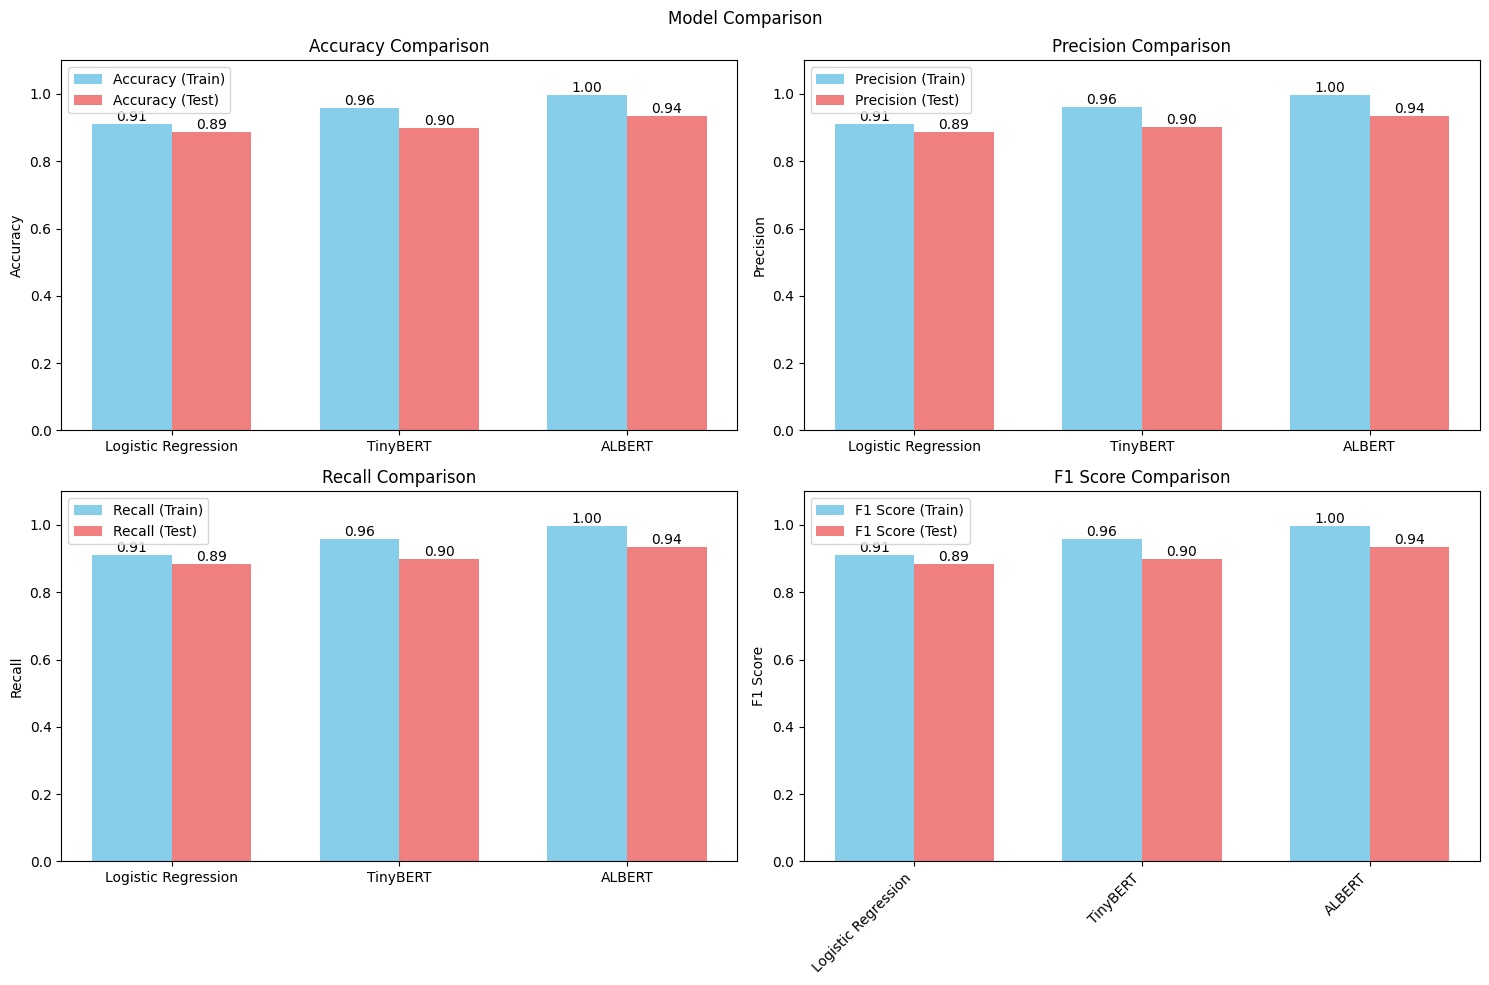

In [ ]:
# Create a dictionary to store the results for each model
# The dictionary contains performance metrics (Accuracy, Precision, Recall, F1 Score) for both training and test datasets for three models (Logistic Regression, TinyBERT, ALBERT)
model_results = {
    "Logistic Regression": {
        "Accuracy (Train)": logreg_acurcy_tr_an,  # Training accuracy for Logistic Regression
        "Precision (Train)":  log_reg_prcisn_trn,  # Training precision for Logistic Regression
        "Recall (Train)":  log_reg_recal_trn,  # Training recall for Logistic Regression
        "F1 Score (Train)":  log_reg_f1_trn,  # Training F1 Score for Logistic Regression
        "Accuracy (Test)": logreg_acurcy_tst,  # Test accuracy for Logistic Regression
        "Precision (Test)": logreg_precsn_tst,  # Test precision for Logistic Regression
        "Recall (Test)": logreg_recal_tst,  # Test recall for Logistic Regression
        "F1 Score (Test)": logreg_f1_test,  # Test F1 Score for Logistic Regression
    },
    "TinyBERT": {
        "Accuracy (Train)": tny_brt_acurcy,  # Training accuracy for TinyBERT
        "Precision (Train)": tny_brt_precsn,  # Training precision for TinyBERT
        "Recall (Train)": tny_brt_recal,  # Training recall for TinyBERT
        "F1 Score (Train)": tinybert_f1,  # Training F1 Score for TinyBERT
        "Accuracy (Test)": tinybert_acurcy_tst,  # Test accuracy for TinyBERT
        "Precision (Test)": tinybert_precsn_tst,  # Test precision for TinyBERT
        "Recall (Test)": tinybert_recal_tst,  # Test recall for TinyBERT
        "F1 Score (Test)": tinybert_f1_test,  # Test F1 Score for TinyBERT
    },
    "ALBERT": {
        "Accuracy (Train)": albert_acurcy_tr_an,  # Training accuracy for ALBERT
        "Precision (Train)": albert_precision_train,  # Training precision for ALBERT
        "Recall (Train)": albert_recall_train,  # Training recall for ALBERT
        "F1 Score (Train)": albert_f1_train,  # Training F1 Score for ALBERT
        "Accuracy (Test)": albert_acurcy_tst,  # Test accuracy for ALBERT
        "Precision (Test)": albert_precsn_tst,  # Test precision for ALBERT
        "Recall (Test)": albert_recal_tst,  # Test recall for ALBERT
        "F1 Score (Test)": albert_f1_test,  # Test F1 Score for ALBERT
    },
}

# Create subplots for each metric (Accuracy, Precision, Recall, F1 Score)
fig, axes = mt_plot.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Create a 2x2 grid of subplots
fig.suptitle("Model Comparison")  # Set the main title for the entire figure

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]  # Define the list of metrics to plot
datasets = ["Train", "Test"]  # Define the datasets (Train and Test) for comparison

# Loop over each metric and create corresponding subplots
for i, metric in enumerate(metrics):
    row = i // 2  # Determine the row index for the current subplot
    col = i % 2  # Determine the column index for the current subplot
    a_xs = axes[row, col]  # Access the appropriate subplot based on row and column

    x = list(model_results.keys())  # Extract model names (Logistic Regression, TinyBERT, ALBERT)
    tr_an_y = [model_results[model][f"{metric} ({datasets[0]})"] for model in model_results]  # Get the training data for the current metric
    tst_y = [model_results[model][f"{metric} ({datasets[1]})"] for model in model_results]  # Get the test data for the current metric

    bar_width = 0.35  # Width of bars for the bar plot
    indices = range(len(x))  # Create indices for the models

    # Plot bars for training data
    bars_train = a_xs.bar(indices, tr_an_y, width=bar_width, label=f"{metric} ({datasets[0]})", color='skyblue')  # Plot training data as blue bars
    # Plot bars for test data
    bars_test = a_xs.bar([index + bar_width for index in indices], tst_y, width=bar_width, label=f"{metric} ({datasets[1]})", color='lightcoral')  # Plot test data as red bars

    # Adding labels on bars for training data
    for bar in bars_train:
        a_xs.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}",
                ha='center', va='bottom')  # Display the value on top of the bar

    # Adding labels on bars for test data
    for bar in bars_test:
        a_xs.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}",
                ha='center', va='bottom')  # Display the value on top of the bar

    a_xs.set_ylabel(metric)  # Set the y-axis label for the current subplot
    a_xs.set_title(f"{metric} Comparison")  # Set the title for the current subplot
    a_xs.set_xticks([index + bar_width / 2 for index in indices])  # Adjust x-ticks to position between bars
    a_xs.set_xticklabels(x)  # Set model names as x-tick labels
    a_xs.legend()  # Add a legend to differentiate between training and test data
    a_xs.set_ylim([0, 1.1])  # Set y-axis limit to a maximum of 1.1 for better visualization
    mt_plot.xticks(rotation=45, ha='right')  # Rotate x-tick labels for readability

# Adjust layout to prevent overlap and improve appearance
mt_plot.tight_layout()
# Display the plot
mt_plot.show()
